# An Analysis On Video Game Sales

This project is centered around video game sales dataset hosted on kaggle. I'm trying to investigate a few fields of enquiries related to the data. To do so I'll visualize all the relevent data to each field and look for patterns and correlations. The data, which was originally a csv file, is going to be handled as a pandas dataframe. I'll then use matplotlib and seaborn to visualize various graphs. For further analysis I might import other datasets and link them together to find new relations between variables. This project is the result of the 6 week course on data analysis with python provided by jovian.ml in collaboration with freecodecamp. I've learnt about various topics such as using libraries like matplotlib and seaborn to display data, pandas to handle all the data and it's various methods.

## Step 1: Data Cleanup

In this first step we're going to load up the data and try to find any 'bad' data in the provided dataset before we begin anything else. We'll handle each case appropriately, whether it be missing values or incorrect inputs.

To begin with we import all the relevant libraries for this notebook and specify ourgraph formatting preferences for later.

In [1]:
import pandas as pd
import jovian
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

project_name = "zerotopandas-course-project"

sns.set_style('whitegrid')
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (10, 5)
matplotlib.rcParams['figure.facecolor'] = '#3080200B'

Next import the data which is in a csv file located in the current directory so I can directly access it.

In [2]:
game_sales_original_df = pd.read_csv('vgsales.csv')

In [3]:
game_sales_original_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


This dataset has nearly 170000 video game's data recorded and 11 fields of data regarding each game. Also the unique identifier (Rank) is given to each game according to volume of global sales, with the value of sales going down as rank increases. However, the value of the highest rank is 2 than the number of rows. This is something we can look into later but we now know not use the row number and Rank value interchangeably. Instead let's take a look at what kind of data we have regarding each individual game.

Note: All the sales are in millions

In [4]:
game_sales_original_df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

From looking at the columns, I've come up with three potential topics we can investigate today. Firstly looking into patterns between regional sales, which games dominate which regions. Secondly correlations between the genres and the year published in, which is how commonly different genres of games were published over the years. Lastly comparing different games released by the same publisher, how consistent a publisher is in terms of sales.

But we're getting ahead of ourselves, let's first complete the task we started, data cleanup. To do that, we can use in built functions like info() and describe(), to see an overview of what the data is like.

In [5]:
game_sales_original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


All the data types are correctly assigned with each field and it seems every column is completely filled with the exceptions of Year and Publisher missing a few entries. This is most likely the case for very old games where the publisher doesn't exist anymore and thus information regarding the game is difficult to find. We're going to investigate this regardless, but it's important to try and make educated guesses on what might be the cause. Because when we start investigating with a hypothesis to test in mind, it's clear what we're looking for. Alternatly, we'd have the data sprawled in front of us but not know what we're looking for, which is a very ineffictive method to go about it. Hence, even if your hypothesis keep ending up proven wrong, it's important to keep it up. After all, that is the purpose of a hypothesis.

Now onto testing it. We'll have a look at some of the games that have their year published missing to get an idea of what could be the actual reason.

Upon further inspection it seems my hypothesis was wrong. The first part, that the release date is missing for old games, is disproven by the fact that there are games released on the ps3 with missing published dates, meaning they were relatively recently published. Also a quick google search reveals the release date for all of them. The second part of my hypothesis, that the publisher's no longer exist, is disproved by the fact that there well known franchises like WWE Smackdown by THQ or Space Invaders which is a famous revolutionary game by Atari that kickstarted a lot of the gaming industry.

Now just because our hypothesis was wrong doesn't mean we haven't learnt anything from this inspection. You can take the optimistic approach and say we now know with confidence that the missing values are simply errors made while entering the data, and not because that data is unavailible or unkown.


We're officially done with step 1

## Step 2: Isolating and Analysing Data For Each Inquiry

Step 2 involves seperating relevent columns and formatting them so that we can analyze the relations between them, without any interference from unrelated data. We'll have to repeat the same procedure for each of the three fields on enquiry we're making.



## Enquiry 1: Pattern in regional sales

I've decided to go two ways about extracting the data. The first method is comparing the regional sales for each individual game as fractions of the total sales of that game. This would tell us which region each game did best in and can later be used.
Let's try and create that data.

First we'll just see how the raw sales compare in each region and then add columns representing the fraction of sales for each region since it might be useful later on to arrange the rows using that.

In [6]:
sales_sum = game_sales_original_df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].sum()
sales_sum

NA_Sales       4392.95
EU_Sales       2434.13
JP_Sales       1291.02
Other_Sales     797.75
dtype: float64

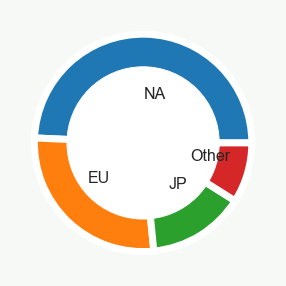

In [7]:
my_circle=plt.Circle( (0,0), 0.7, color='white')
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(sales_sum, labels=["NA","EU","JP","Other"], labeldistance=0.45, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show();

In [8]:
game_sales_original_df["NA_Sales_Frac"] = game_sales_original_df.NA_Sales/game_sales_original_df.Global_Sales
game_sales_original_df["EU_Sales_Frac"] = game_sales_original_df.EU_Sales/game_sales_original_df.Global_Sales
game_sales_original_df["JP_Sales_Frac"] = game_sales_original_df.JP_Sales/game_sales_original_df.Global_Sales
game_sales_original_df["Others_Sales_Frac"] = game_sales_original_df.Other_Sales/game_sales_original_df.Global_Sales

game_sales_original_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Sales_Frac,EU_Sales_Frac,JP_Sales_Frac,Others_Sales_Frac
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,0.501450,0.350737,0.045564,0.102248
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0.722664,0.088966,0.169235,0.019135
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,0.442490,0.359576,0.105807,0.092406
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,0.477273,0.333636,0.099394,0.089697
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0.359260,0.283392,0.325789,0.031878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,1.000000,0.000000,0.000000,0.000000
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,1.000000,0.000000,0.000000,0.000000
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0.000000,0.000000,0.000000,0.000000
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0.000000,1.000000,0.000000,0.000000


Now let's take a look at a few of the games that are sold most in NA.

In [9]:
top_sold_NA_df = game_sales_original_df.sort_values(["NA_Sales_Frac"], ascending = False)
top_sold_NA_df.head(15)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Sales_Frac,EU_Sales_Frac,JP_Sales_Frac,Others_Sales_Frac
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.0,0.0,0.0,0.01,1.0,0.0,0.0,0.0
12983,12985,Pony Friends: Mini Breeds Edition,DS,2008.0,Simulation,Eidos Interactive,0.05,0.0,0.0,0.0,0.05,1.0,0.0,0.0,0.0
13074,13076,Sam & Max: Beyond Time and Space,Wii,2010.0,Adventure,Atari,0.05,0.0,0.0,0.0,0.05,1.0,0.0,0.0,0.0
13071,13073,Over the Hedge: Hammy Goes Nuts!,PSP,2006.0,Platform,Activision,0.05,0.0,0.0,0.0,0.05,1.0,0.0,0.0,0.0
13069,13071,Kids Learn Music A+ Edition,DS,2011.0,Misc,Unknown,0.05,0.0,0.0,0.0,0.05,1.0,0.0,0.0,0.0
13063,13065,SeaWorld Adventure Parks: Shamu's Deep Sea Adv...,DS,2005.0,Adventure,Activision,0.05,0.0,0.0,0.0,0.05,1.0,0.0,0.0,0.0
13062,13064,Pet Pals: New Leash on Life,DS,2010.0,Simulation,Destineer,0.05,0.0,0.0,0.0,0.05,1.0,0.0,0.0,0.0
13061,13063,Imagine: Artist,DS,2009.0,Misc,Ubisoft,0.05,0.0,0.0,0.0,0.05,1.0,0.0,0.0,0.0
13058,13060,Fishdom,DS,2011.0,Puzzle,Atari,0.05,0.0,0.0,0.0,0.05,1.0,0.0,0.0,0.0
13051,13053,Jenga World Tour,Wii,2007.0,Misc,Atari,0.05,0.0,0.0,0.0,0.05,1.0,0.0,0.0,0.0


It seems that these games were only published in America only and thus all the sales come from that region. Looking at the values of the sales we can see that these were small games, which makes sense as they didn't have the capital to release the game internationally. So we need to remove the games that were only sold in a single region, as their sales fraction values are meaningless to us. We're going to try to accomplish that by removing all the games with sales below a certain threshold.

In [10]:
int_sales_df = game_sales_original_df[game_sales_original_df.Global_Sales > 0.15]
int_sales_df.tail(15)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Sales_Frac,EU_Sales_Frac,JP_Sales_Frac,Others_Sales_Frac
8701,8703,Space Camp,DS,2009.0,Action,Activision,0.14,0.00,0.00,0.01,0.16,0.8750,0.0000,0.000,0.0625
8702,8704,Imagine: Music Fest,DS,2009.0,Simulation,Ubisoft,0.15,0.00,0.00,0.01,0.16,0.9375,0.0000,0.000,0.0625
8703,8705,AC/DC LIVE: Rock Band Track Pack,PS2,2008.0,Misc,MTV Games,0.08,0.06,0.00,0.02,0.16,0.5000,0.3750,0.000,0.1250
8704,8706,Senran Kagura: Sh?jo-tachi no Shinei,3DS,2011.0,Action,Marvelous Interactive,0.00,0.00,0.16,0.00,0.16,0.0000,0.0000,1.000,0.0000
8705,8707,Ultimate Spider-Man,DS,2005.0,Action,Activision,0.14,0.00,0.00,0.01,0.16,0.8750,0.0000,0.000,0.0625
8706,8708,Fist of the North Star: Ken's Rage,X360,2010.0,Action,Ubisoft Annecy,0.07,0.02,0.06,0.01,0.16,0.4375,0.1250,0.375,0.0625
8707,8709,Jurassic Park: The Game,X360,NaN,Action,Unknown,0.15,0.00,0.00,0.01,0.16,0.9375,0.0000,0.000,0.0625
8708,8710,He-Man: Power of Grayskull,GBA,2002.0,Action,TDK Mediactive,0.11,0.04,0.00,0.00,0.16,0.6875,0.2500,0.000,0.0000
8709,8711,WordJong,DS,2007.0,Puzzle,White Park Bay Software,0.13,0.01,0.00,0.01,0.16,0.8125,0.0625,0.000,0.0625
8710,8712,Putty Squad,PS4,2013.0,Platform,System 3,0.06,0.07,0.00,0.02,0.16,0.3750,0.4375,0.000,0.1250


Looking at the lowest sales games it seems like we were successful in reducing the list to only games sold internationally. We've lost some other small games that were sold internationally but even those were largely centered in one region, since small games usually don't have multiple language settings thus limiting it's sales to one language.

Now let's try to visualize how all the sales are distributed between the regions.

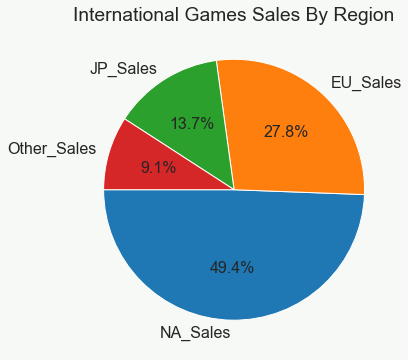

In [11]:
sales_regions_sum_df = int_sales_df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].sum()
plt.figure(figsize=(12,6))
plt.title("International Games Sales By Region")
plt.pie(sales_regions_sum_df, labels=sales_regions_sum_df.index, autopct='%1.1f%%', startangle=180);

America takes the lead as expected both due to it's population and the culture surrounding the youth and even adults with respect to video games. What's interesting is that Japan has half as many sales as in all of EU, despite having a much smaller population. This emphazises just how popular it is in that region.

On a similar tangent, let's try to get which region each game was most popularly sold in and visualize that data.

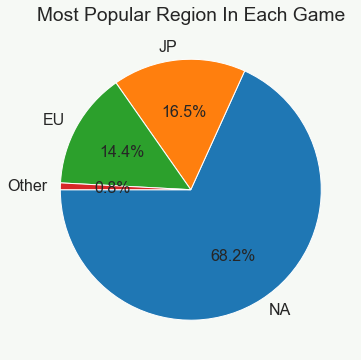

In [12]:
conditions = [
    (int_sales_df.NA_Sales > int_sales_df.EU_Sales) & (int_sales_df.NA_Sales > int_sales_df.JP_Sales)
    & (int_sales_df.NA_Sales > int_sales_df.Other_Sales),
    (int_sales_df.EU_Sales > int_sales_df.NA_Sales) & (int_sales_df.EU_Sales > int_sales_df.JP_Sales)
    & (int_sales_df.EU_Sales > int_sales_df.Other_Sales),
    (int_sales_df.JP_Sales > int_sales_df.EU_Sales) & (int_sales_df.JP_Sales > int_sales_df.NA_Sales)
    & (int_sales_df.JP_Sales > int_sales_df.Other_Sales),
    (int_sales_df.Other_Sales > int_sales_df.EU_Sales) & (int_sales_df.Other_Sales > int_sales_df.JP_Sales)
    & (int_sales_df.Other_Sales > int_sales_df.NA_Sales)
]
choices = ["NA", "EU", "JP", "Other"]
pd.options.mode.chained_assignment = None 
int_sales_df["Most_Popular_Game"] = np.select(conditions, choices)
region_count = int_sales_df.Most_Popular_Game.value_counts()
int_sales_df

plt.figure(figsize=(12,6))
plt.title("Most Popular Region In Each Game")
plt.pie(region_count[0:4], labels=["NA", "JP", "EU", "Other"], autopct='%1.1f%%', startangle=180);

As expected America takes the lead once again by an even larger gap, but the real reason I wanted to display this data is to show that Japan has more titles than Europe. Combining this chart with the previous one, which showed Europe having twice as many sales as Japan, we can confidently infer each regions traits. 

America is always in the lead due to both it's large population and culcture of gaming. 

Japan might not have a large population but their culture is even more embedded with video games. That's why they have 16.5% of international titles being sold mostly in Japan. Because due to the demand for games locally, Japan has a thriving video game publishing industry and games aimed at their population. Those games do much better in their own region than anywhere else.

Europe on the other hand having a much larger population than either of those two regions and the technological advancements to access video games, fall far behind in expected sales. This might be due to the delay in moderness for a lot of the conservative regions. Thus the hobby of video games is largely just contained with the new generation of youth.

As for the rest of the world, while they do consist for 10% of sales, hardly any large international titles are sold in majority over there. To begin with, we have to realize taking NA, EU and JP out of the picture leaves us with largely third world countries. While the population is much greater than any of the other three regions described above, most places don't have the comfort to have video gaming as a hobby. And most of the sales are just the top selling games which are most likely to be shipped and sold everywhere. As a result it's very unlikely that it would be the most popular region for those games as they are popular everywhere in the world.

## Enquiry 2: Identifying Trends Between Genres and Regions

In [13]:
NA_Highest_Sold = int_sales_df.sort_values("NA_Sales", ascending = False).Name[0]
EU_Highest_Sold = int_sales_df.sort_values("EU_Sales", ascending = False).Name[0]
JP_Highest_Sold = int_sales_df.sort_values("JP_Sales", ascending = False).Name[0]
Other_Highest_Sold = int_sales_df.sort_values("Other_Sales", ascending = False).Name[0]

In [14]:
NA_Highest_Majority_df = int_sales_df[int_sales_df.Most_Popular_Game == "NA"].copy()
EU_Highest_Majority_df = int_sales_df[int_sales_df.Most_Popular_Game == "EU"]
JP_Highest_Majority_df = int_sales_df[int_sales_df.Most_Popular_Game == "JP"]
Other_Highest_Majority_df = int_sales_df[int_sales_df.Most_Popular_Game == "Other"]

NA_Highest_Majority = NA_Highest_Majority_df.Name[NA_Highest_Majority_df.index[0]]
EU_Highest_Majority = EU_Highest_Majority_df.Name[EU_Highest_Majority_df.index[0]]
JP_Highest_Majority = JP_Highest_Majority_df.Name[JP_Highest_Majority_df.index[0]]
Other_Highest_Majority = Other_Highest_Majority_df.Name[Other_Highest_Majority_df.index[0]]

print("The most sold games were in each region were:\nNA:{0}\nEU:{1}\nJP:{2}\nRest of the world:{3}\nNow for the top sold game that was sold the most in a single region:\nNA:{4}\nEU:{5}\nJP:{6}\nRest of the world:{7}".format(
    NA_Highest_Sold,EU_Highest_Sold,JP_Highest_Sold,Other_Highest_Sold,NA_Highest_Majority,EU_Highest_Majority,
    JP_Highest_Majority,Other_Highest_Majority))

The most sold games were in each region were:
NA:Wii Sports
EU:Wii Sports
JP:Wii Sports
Rest of the world:Wii Sports
Now for the top sold game that was sold the most in a single region:
NA:Wii Sports
EU:Nintendogs
JP:Pokemon Black/Pokemon White
Rest of the world:Grand Theft Auto: San Andreas


Wii Sports takes the lead in terms of raw sales for every region due to the huge gap between it and the other games. It has twice as many sales as the game in second place and thus this information doesn't give us much insight. However using the second metric of games with a majority sales in one region we get some new information:

America takes Wii Sports as expected.

Europe has Nintendogs, which is pet simulator type game. We could make a hypothesis saying the European region is less interested in action genre games and more in relaxed simulators. We could verify it by checking other games where Europe was the largest sales region.

Japan has Pokemon Black which makes sense as the pokemon games were born there but the question is why pokemon black which is the 5th generation of pokemon games. Was this the most popular pokemon game or was Japan not the majority of sales for the other ones?

Lastly GTA: San Andreas was the most popular game that was bought in majority by the rest of the world. We can further investigate how the other games in the GTA series did internationally to see if there's a pattern.

Let's investigate each of these three issues, starting with the European region. A fair way to see which games genres are popular in Europe are to first filter out the games with a small fraction of sales in Europe. Using the fractions of total sales instead of just sales allows us to see smaller games, as well as blocking out games that weren't popular in Europe but just did so well overall that they still make the cut. Also we're using the international games dataframe for this to work as even unpopular games that are only sold in that region will account for 100% of the sales then.

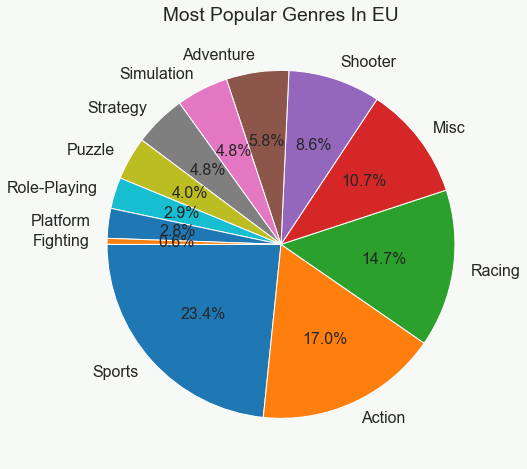

In [15]:
EU_Popular_df = int_sales_df[int_sales_df.EU_Sales_Frac > 0.5]
EU_Genre_Count = EU_Popular_df.Genre.value_counts()

EU_Genre_df = EU_Popular_df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].sum()
plt.figure(figsize=(14,8))
plt.title("Most Popular Genres In EU")
plt.pie(EU_Genre_Count, labels=EU_Genre_Count.index, autopct='%1.1f%%', startangle=180);

Now we can't make assumptions and theories off of just this diagram, without knowing how the genres of international games sold. Now we could make two separate diagrams and make comparisons but an even more efficient method would be creating just one diagram where each genre is given as a fraction of all the games in that genre. Especially since genres like Fighting or Role-Playing could be completely centered in the European region, but this diagram tells us the opposite. Since we're comparing Europe to international sales we might as well add the other regions too. Now in order for all the bars to add up to 100% we'll use all the internationally sold games and divide them into whichever region had the most sales.

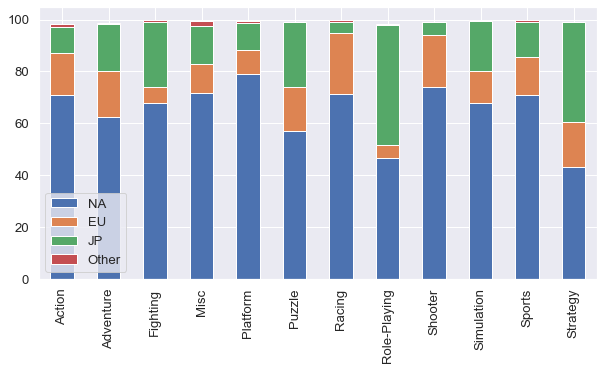

In [16]:
int_genre_count = int_sales_df.Genre.value_counts()
NA_Genre_Count = NA_Highest_Majority_df.Genre.value_counts()
EU_Genre_Count = EU_Highest_Majority_df.Genre.value_counts()
JP_Genre_Count = JP_Highest_Majority_df.Genre.value_counts()
Other_Genre_Count = Other_Highest_Majority_df.Genre.value_counts()
EU_Genre_Count_Perc = EU_Genre_Count*100/int_genre_count
NA_Genre_Count_Perc = NA_Genre_Count*100/int_genre_count
JP_Genre_Count_Perc = JP_Genre_Count*100/int_genre_count
Other_Genre_Count_Perc = Other_Genre_Count*100/int_genre_count
EU_Genre_Count_Perc = EU_Genre_Count_Perc.rename("EU")
NA_Genre_Count_Perc = NA_Genre_Count_Perc.rename("NA")
JP_Genre_Count_Perc = JP_Genre_Count_Perc.rename("JP")
Other_Genre_Count_Perc = Other_Genre_Count_Perc.rename("Other")

final_df = pd.concat([NA_Genre_Count_Perc,EU_Genre_Count_Perc,JP_Genre_Count_Perc,Other_Genre_Count_Perc], axis = 1)
final_df = final_df.T

sns.set(font_scale=1.2)
final_df.set_index(pd.Index(["NA","EU","JP","Other"])).T.plot(kind='bar', stacked=True);

Now this diagram tells us a different story. The reason all the bars don't go up to 100% is that a few games were tied in sales between regions and thus were discarded.

But moving on we saw that Sports was the biggest genre in the previous chart. However looking at this one Sports sales in EU are just average compared to their sales in other genres. Racing is better represented genre as it's displayed with high relative values in both charts. It also seems to be Europes largest portion of a genre majority. Role-Playing games in Europe are also reflected well on both charts by having a very small relative portion.

Now besides Europe, the biggest thing that stands out is Japans domination in the Role-Playing and Strategy genres. Remember Japan is in third place in terms of raw sales so this shows that the sales are really concentrated in a few genres. Looking further into the Role-Playing games genre, I found out that Japan has their own sub genre called JRPG(Japanese Role-Playing Game). This further proves that that the strongest fan-base of RPGs is in Japan.

A small note is that with this dataset, America is largely dominant in nearly every aspect. But for the genres where others are more successful, we can percieve that in two different ways. One, that the video game genre didn't appeal to the American population as much. Thus other regions would do significantly better even if their sales were relatively average or even lower than their sales in other genres. The second approach is that the genre did average in America, but was very well received by another region and therefore it did much better in sales relative to other genres. In reality it's most likely a combination of both of these reasons to a certain extent.

Lastly, the rest of the world hardly has any games or genres where they're dominant in sales. This is partly becuase they have the least amount of raw sales in general but even then Japan isn't too far ahead in that regard and yet still manages to have a sizable prescence in several genres. The main reason for the rest of the world not being a majority buyer for games is that the sales are very split between hundreds of countries. There's no shared culture or interest in a certain genre. Most of the sales are just the popular games being shipped everywhere but no chance of the rest of the world to beat America in terms of most sold copies.

## Enquiry 3: Pokemon Series
As we saw previously, Pokemon Black was the highest ranked game sold in majority to Japan. Now Pokemon Black is the fifth generation in it's series and now we need find out why it was ranked first. Was it becuase the other more popular games didn't have a majority of sales in Japan, or is there something special about Pokemon Black giving it first place.

In [17]:
pokemon_games_df = game_sales_original_df[game_sales_original_df["Name"].str.contains("Pokemon")]
pokemon_games_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Sales_Frac,EU_Sales_Frac,JP_Sales_Frac,Others_Sales_Frac
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0.359260,0.283392,0.325789,0.031878
12,13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,0.389610,0.267532,0.311688,0.030736
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36,0.349673,0.246187,0.328976,0.074619
25,26,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85,0.382334,0.246057,0.339432,0.031546
26,27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32,0.363577,0.214099,0.368799,0.053525
32,33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35,0.360279,0.282230,0.302439,0.055052
45,46,Pokemon HeartGold/Pokemon SoulSilver,DS,2009.0,Action,Nintendo,4.40,2.77,3.96,0.77,11.90,0.369748,0.232773,0.332773,0.064706
49,50,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33,0.373345,0.297440,0.271845,0.057370
58,59,Pokemon FireRed/Pokemon LeafGreen,GBA,2004.0,Role-Playing,Nintendo,4.34,2.65,3.15,0.35,10.49,0.413727,0.252622,0.300286,0.033365
81,82,Pokemon Black 2/Pokemon White 2,DS,2012.0,Role-Playing,Nintendo,2.91,1.86,3.14,0.43,8.33,0.349340,0.223289,0.376951,0.051621


Looking at all the Pokemon games, we see that Pokemon Black is fifth most sold in the series. First place goes to Pokemon Red which is the oldest one released in 1996. Another thing is that the main game series released every generation are the top sold game with almost all of them having over 10M international sales. The rest of the games are spinoffs/mini series that didn't follow the usual pokemon games style. Now to answer our initial question, we see that the reason Pokemon Black was the first one with majority sales in Japan is because the top 4 games above it are all majority American sales. Now to check the actual popularity of the pokemon game in each region we need to add population data. Population dataframes have a countries column with which you combine the dataframes, but since our data is quite different it's much easier to just hardcode and enter the data ourselves since it's just 4 numbers.

Note: This data was collected in 2016 so we'll retrieve the population figures for the same year.

NA_Sales       4392.95
EU_Sales       2434.13
JP_Sales       1291.02
Other_Sales     797.75
dtype: float64


/Users/moaaz/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


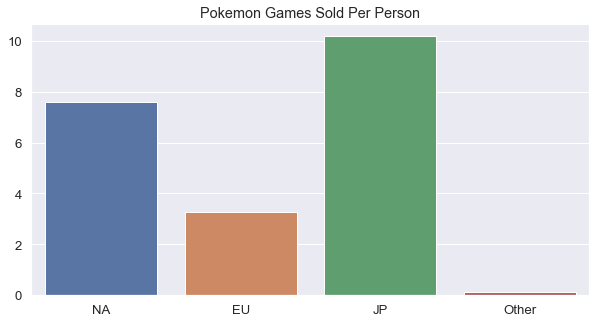

In [18]:
# Population is in millions just like sales
regions = ["NA","EU","JP","Other"]
na_pop = 579
eu_pop = 741.4
jp_pop = 127
others_pop = 7426 - na_pop - eu_pop - jp_pop
pop_arr = [na_pop,eu_pop,jp_pop,others_pop]
regions_sales_sum = game_sales_original_df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].sum()
sales_per_person = regions_sales_sum/pop_arr
sns.barplot(regions, sales_per_person).set_title("Pokemon Games Sold Per Person");
print(regions_sales_sum)

This diagram finally shows the reality of just how popular the Pokemon franchise is in Japan. With an astounding average of 10 pokemon games sold per person.

Now obviously this doesn't mean every single person has actually bought 10 pokemon games. There could people who've never bought a single one. But at the same time there are avid fans who've bought every release in the series, which is 35 in this dataset. On the other hand, there are also stores which bought a large stock of the games but might not have sold every last piece. The company would still count these sales, as some third party store owner still bought them. You might also argue the game sold per person argument is invalid as the sales are accounted for a span of 20 years.

An additional arugement with that would be Japan's unique population change over that same period. The population in 1996 was almost the same as in 2016, off by by under 1%. This is becuase of Japans declining birth rate over this period. The population did go up in the 1996-2016 period but then halfway through started coming back down. Using this knowledge along with the fact that the Pokemon games are aimed at children, although plenty of young adults play it too, we can infer that while the statistic of average games sold per person are technically true, they are inflated due to the aforementioned reasons. Looking at Japan's population demograph through that time period it's true that the percantage of older citizens is increasing but there was a baby boom just a bit before the start of the Pokemon games. That generation grew up with the start of video game technologies like the atari or game boy, and thus it was inevitable that they would come across Pokemon. As they grew older they kept buying the latest addition to the franchise, although of course not all of them would but a large majority as is shown by the data.

Moving on, North America surprisingly isn't that far behind. With a bit over of 7 pokemon games bought by the average person. However I believe this number is also inflated for another reason. The start of e-commerce with sites like eBay and Amazon meant that anyone could sell anything online to anyone in the world, as long as shipping was handled. While a lot of sales are just within the same country, there are people from countries where the pokemon games might not have been sent or it's out of stock. These people would end up buying from individual sellers, but the game sale would still belong to the original buyers region. However at the end of the day we still need to acknowledge the fact that the Pokemon series is quite popular in the North America region.

Onto Europe, where it has a lower average of 3 pokemon games per person. There's nothing too intersting about this, as it was expected to have a lower value, as video games in general aren't as popular in Europe as they are in Japan or NA. While it did have twice as many raw sales as Japan, it doesn't even have half as many average sales per person.

The final bar representing the rest of the world shows us how sparsely video gaming is spread in it, or at least the pokemon video games. While it had around 800 million copies sold which was around 40% lower than Japans sale of 1.3 billion copies, it's average games sold per person is not even 1% of Japans average. This is because we're using the rest of the worlds population to represent the other pokemon sales, but in reality there are plenty of countries that don't even have a single copy bought but their population is still added to it.

In [19]:
game_sales_original_df.Name.unique().size

11493

In [20]:
game_sales_original_df.Name

0                                              Wii Sports
1                                       Super Mario Bros.
2                                          Mario Kart Wii
3                                       Wii Sports Resort
4                                Pokemon Red/Pokemon Blue
                               ...                       
16593                  Woody Woodpecker in Crazy Castle 5
16594                       Men in Black II: Alien Escape
16595    SCORE International Baja 1000: The Official Game
16596                                          Know How 2
16597                                    Spirits & Spells
Name: Name, Length: 16598, dtype: object

In [21]:
game_sales_original_df[game_sales_original_df.duplicated(subset="Name")]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Sales_Frac,EU_Sales_Frac,JP_Sales_Frac,Others_Sales_Frac
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,0.587912,0.324176,0.003663,0.084249
35,36,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.73,0.600874,0.313183,0.005098,0.081573
37,38,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5.54,5.82,0.49,1.62,13.46,0.411590,0.432392,0.036404,0.120357
40,41,Call of Duty: Black Ops,PS3,2010.0,Shooter,Activision,5.98,4.44,0.48,1.83,12.73,0.469756,0.348782,0.037706,0.143755
44,45,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98,0.317195,0.484975,0.030050,0.168614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16586,16589,Secret Files 2: Puritas Cordis,DS,2009.0,Adventure,Deep Silver,0.00,0.01,0.00,0.00,0.01,0.000000,1.000000,0.000000,0.000000
16591,16594,Myst IV: Revelation,PC,2004.0,Adventure,Ubisoft,0.01,0.00,0.00,0.00,0.01,1.000000,0.000000,0.000000,0.000000
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,1.000000,0.000000,0.000000,0.000000
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0.000000,0.000000,0.000000,0.000000


In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

## References and Future Work

TODO

Note: The Population for North America was a bit strange to find as I recieved different contradicting answers. This seemed to be because most censuses in the 90s only counted Mexico, Canada and the United States to be part of North America, while the more recent ones inclucde various independant state islands. In the end I decided to just use the three countries to represent NA in 1996, as realistically we can assume they accounted for nearly all the sales.

North America Population 1996 - http://www.fao.org/3/w4345e/w4345e0i.htm#north%20america1,2 

Japan Population Demograph 1996 to 2016 - https://www.populationpyramid.net/japan/1996/


Looking back at splitting the games to one major region, it might've been better to split the games that were tied up equally between all the regions involved. This would both give the representation that the data needed, as well as making our data "complete" meaning all the bars in this diagram would be equal height. The downside would be that it would require longer to process as you'd need compare all the data to find out which ones are tied and then split it up.